# Covid 19 in World

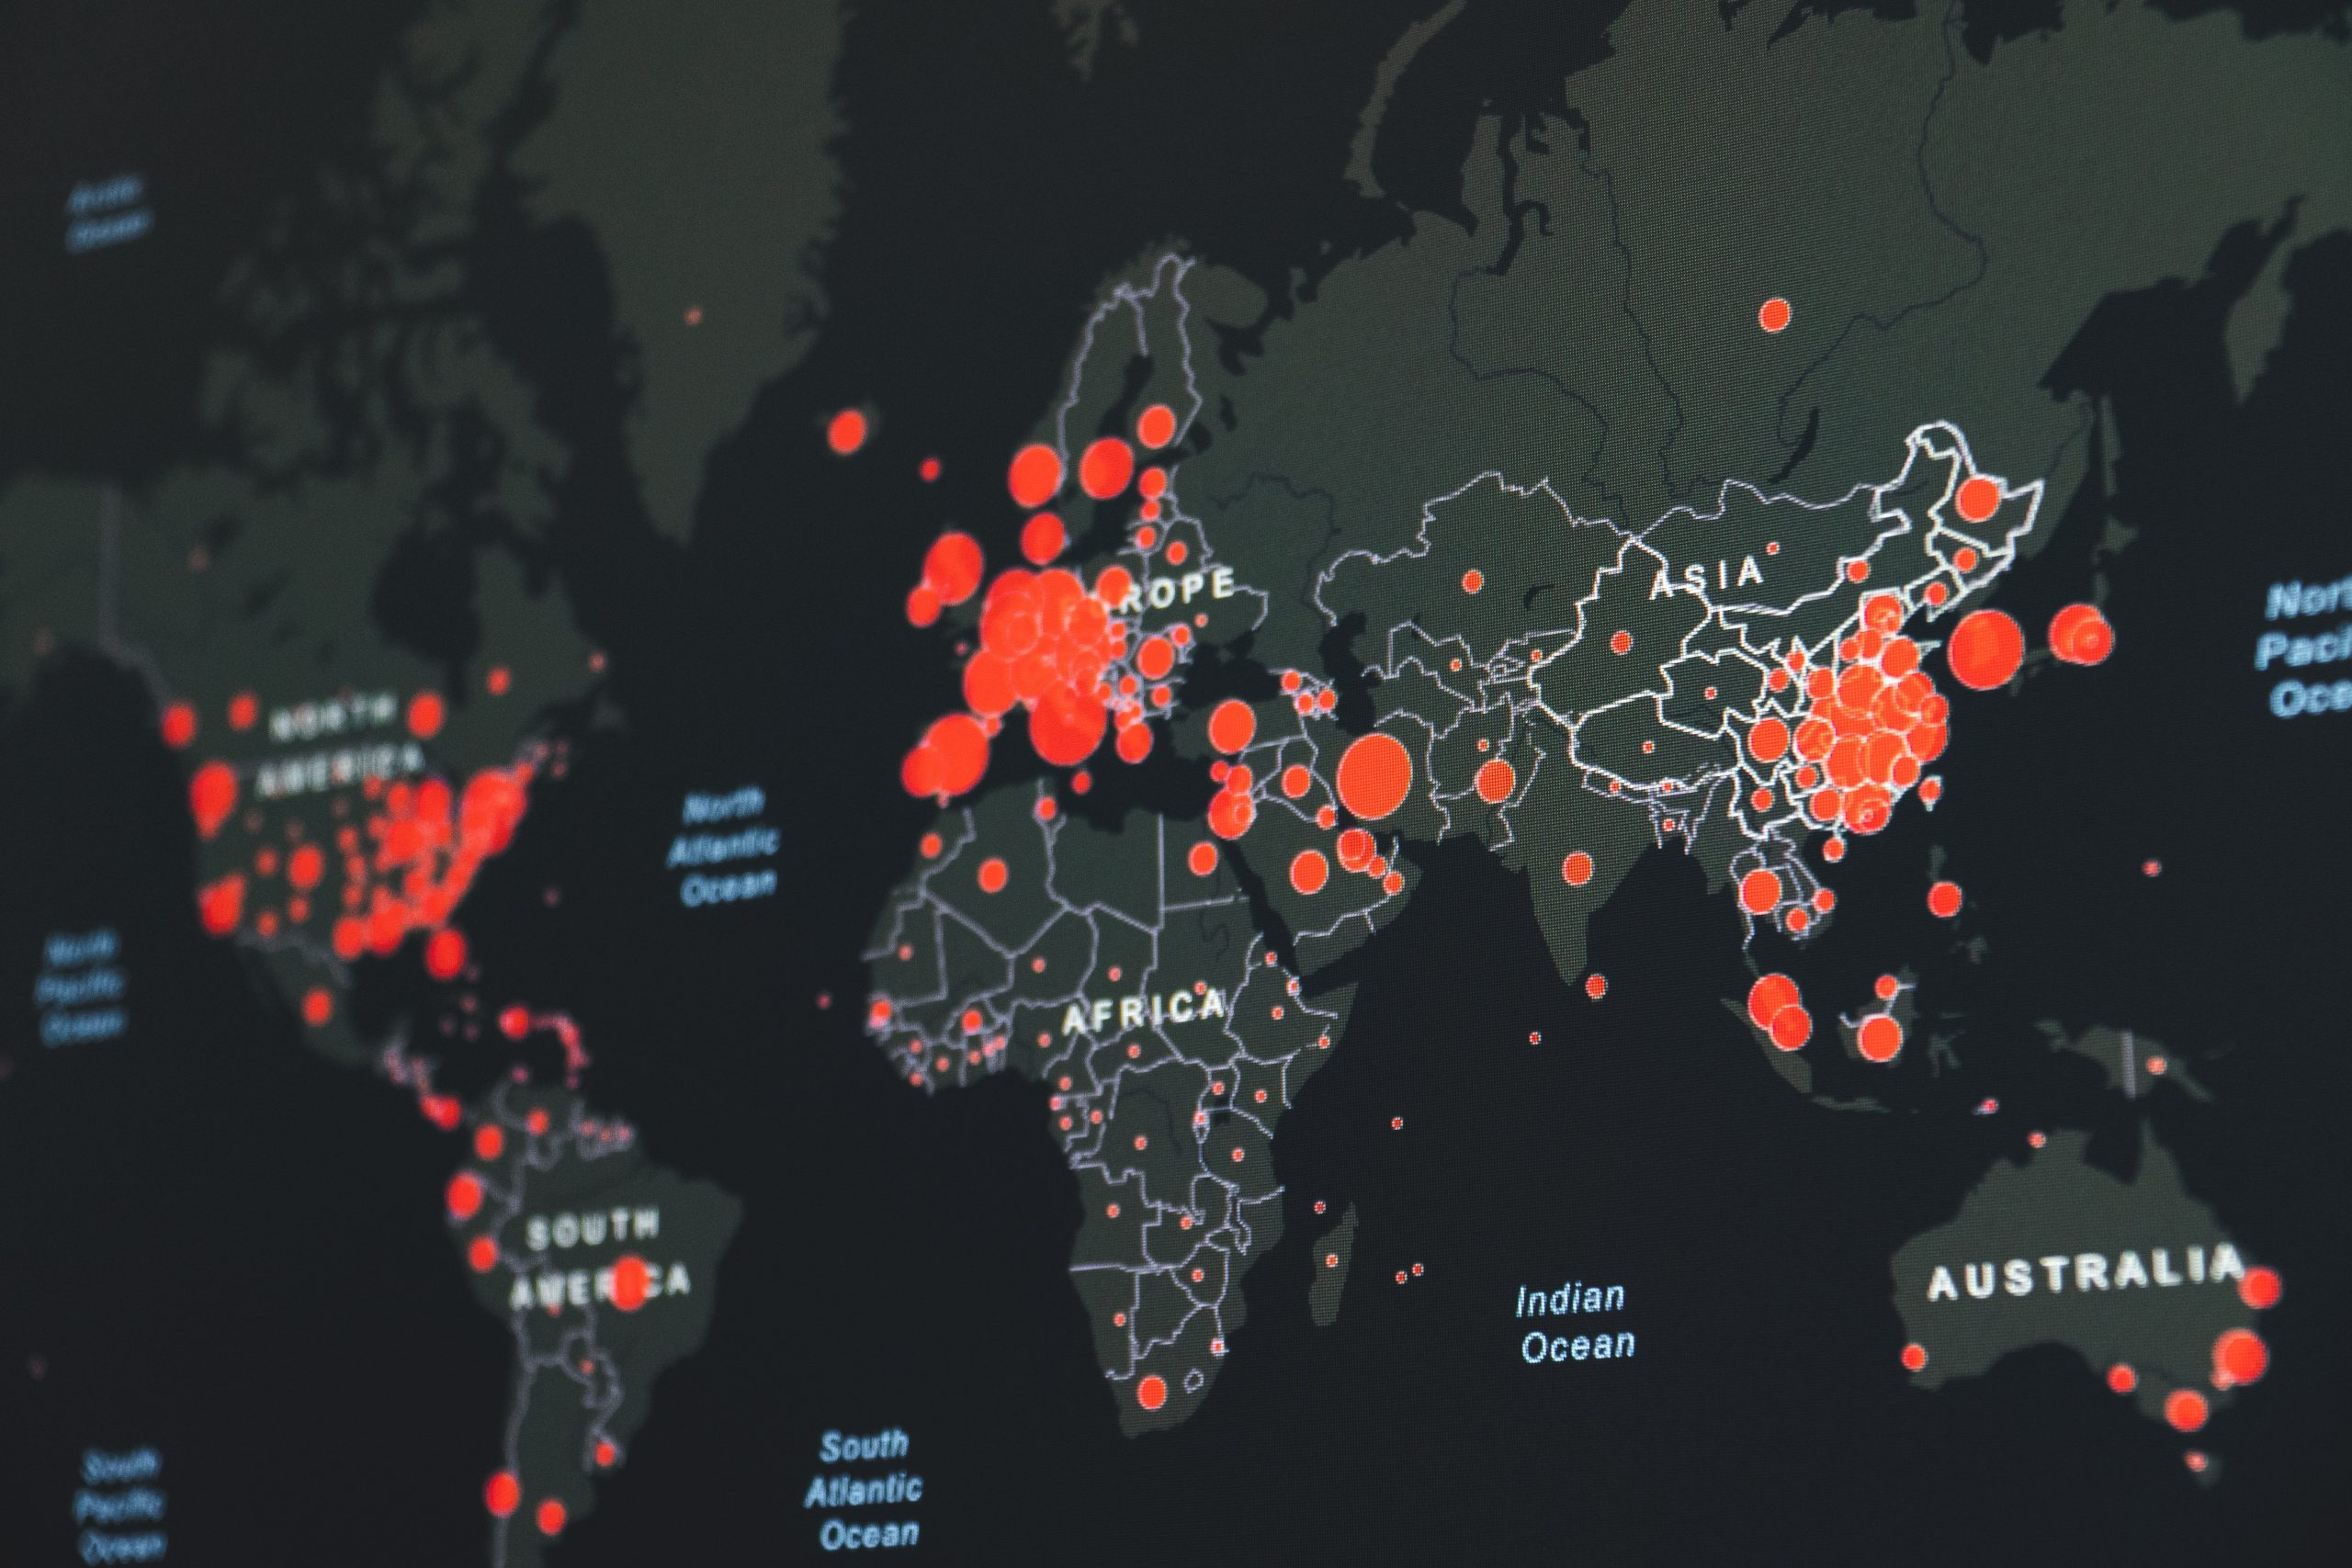

## Introduction to COVID-19 
A novel Corona virus is a category of pathogens, which mostly attacks on the respiratory system of human beings. Corona virus outbreaks are emerging earlier also in the form of Severe Acute Respiratory Syndrome (SARS) and Middle East Respiratory Syndrome (MERS).Now, in the present times, it emerges as a COVID-19, which is caused by the SARS2 Coronavirus and poses a significant risk to the human race. 

In December 2019, a number of patients with pneumonia symptoms were reported in Wuhan and Hubei Province of China and later identified as symptoms caused due to the spread of corona virus. Epidemiologically, these patients were later on found to be linked to an animal and seafood market of Wuhan. Later on, the Wuhan city of China was recognized as the epicentre of the COVID-19 disease and claimed for spreading the disease across the world. Around 41 lab confirmed COVID-19 patients reported and admitted to hospital up to January 2, 2020 in China. These patients have symptoms of coughing, sneezing, breathing problems, chest pain, indigestion, and respiratory illness. It was also observed that most of these patients are already suffering from varied diseases such as hypertension, diabetes and cardiovascular.   

According to China National Health Commission, 17 deaths reported in China with COVID-19 up to January 22, 2020 and within four days death rate raised to triple with 5502 confirmed cases. By the end of January 2020, 7734 confirmed cases have been reported in China along with 90 cases in other countries such as Thailand, Japan, Malaysia, Iran, Italy, India, USA, Canada, Taiwan, Vietnam, France, Nepal, Cambodia, Germany, Singapore, Korea, United Arab Emirates, Sri Lanka, The Philippines, Australia and Finland. 

### Corona Virus Explained in Simple Terms:
- Let's say Raj got infected yesterday, but he won't know it untill next 14 days
- Raj thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

![alt text](https://i.imgur.com/nf2kMhF.jpg)

# Downloading and Saving Covid Data 




In [1]:
import numpy as np
import pandas as pd
import wget
import os
from datetime import datetime, timedelta
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')

#### Checking and removing Source file 

In [2]:
#collecting all files in the directory 
files = [f for f in os.listdir('.') 
         if os.path.isfile(f)]
globle = []
# checking for file contain global within there name 
for f in files:
    if "global" in f:
        globle += [f]
print(globle)
try:
    if globle == []:
        raise Exception
    # removing file containing name global within there name
    for x in globle:
        os.remove(x)
    print('file/files has been removed')            
except:
    print("file doesn't exist")

['time_series_covid19_confirmed_global.csv', 'time_series_covid19_deaths_global.csv', 'time_series_covid19_recovered_global.csv']
file/files has been removed


In [ ]:
# URL list of the raw csv datasets
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]

# Download helper: creates a `data/` folder, downloads only missing files and reports progress
import os

def download_if_missing(urls, dest_dir='data', force=False):
    os.makedirs(dest_dir, exist_ok=True)
    for url in urls:
        local_name = os.path.join(dest_dir, os.path.basename(url))
        if not os.path.exists(local_name) or force:
            print(f"Downloading {url} -> {local_name}")
            try:
                wget.download(url, out=local_name)
                print()  # newline after wget progress
            except Exception as e:
                print(f"\nFailed to download {url}: {e}")
        else:
            print(f"File exists, skipping: {local_name}")

# Run download once (set force=True to re-download)
download_if_missing(urls)


['time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_recovered_global.csv']

# Data Preparation and Cleaning
- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Conerting the data to a apropriate form
- Handle missing, incorrect and invalid data

In [4]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,151291,151563,151770,151770,151770,152142,152243,152363,152411,152448
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,134487,134761,135140,135550,135947,136147,136598,137075,137597,138132
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,184191,185042,185902,186655,187258,187968,188663,189384,190078,190656
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14891,14908,14924,14924,14924,14954,14960,14976,14981,14988
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,43998,44174,44328,44534,44617,44739,44972,45175,45325,45583


In [103]:
deaths_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6978,6988,7000,7000,7000,7025,7031,7043,7047,7054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2460,2460,2461,2463,2464,2466,2468,2471,2473,2475
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4654,4695,4730,4766,4794,4830,4867,4898,4929,4957
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,129,129,129,129,129,129,129,129,129,129
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1063,1070,1082,1086,1100,1103,1118,1125,1133,1138


In [7]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)

(279, 581)
(279, 581)
(264, 581)



## Reshaping The Data

In [9]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/11/21', '8/12/21', '8/13/21', '8/14/21', '8/15/21', '8/16/21',
       '8/17/21', '8/18/21', '8/19/21', '8/20/21'],
      dtype='object', length=581)

In [10]:
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/11/21', '8/12/21', '8/13/21', '8/14/21', '8/15/21', '8/16/21',
       '8/17/21', '8/18/21', '8/19/21', '8/20/21'],
      dtype='object', length=581)

In [11]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/11/21', '8/12/21', '8/13/21', '8/14/21', '8/15/21', '8/16/21',
       '8/17/21', '8/18/21', '8/19/21', '8/20/21'],
      dtype='object', length=581)

In [12]:
# changing the dates from rows to column
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [13]:
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
160978,NaN,Vietnam,14.058324,108.277199,8/20/21,323268
160979,NaN,West Bank and Gaza,31.952200,35.233200,8/20/21,324542
160980,NaN,Yemen,15.552727,48.516388,8/20/21,7454
160981,NaN,Zambia,-13.133897,27.849332,8/20/21,203978


In [14]:
deaths_df_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
160978,NaN,Vietnam,14.058324,108.277199,8/20/21,7540
160979,NaN,West Bank and Gaza,31.952200,35.233200,8/20/21,3629
160980,NaN,Yemen,15.552727,48.516388,8/20/21,1415
160981,NaN,Zambia,-13.133897,27.849332,8/20/21,3569


In [15]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
152323,NaN,Vietnam,14.058324,108.277199,8/20/21,0
152324,NaN,West Bank and Gaza,31.952200,35.233200,8/20/21,0
152325,NaN,Yemen,15.552727,48.516388,8/20/21,0
152326,NaN,Zambia,-13.133897,27.849332,8/20/21,0


## Finding missing values

In [16]:
# Canada recovered data is counted by Country-wise rather than Province/State-wise
recovered_df_mis = recovered_df_long[recovered_df_long['Country/Region'] =='Canada']

In [17]:
recovered_df_mis

,Province/State,Country/Region,Lat,Long,Date,Recovered
39,NaN,Canada,56.1304,-106.3468,1/22/20,0
303,NaN,Canada,56.1304,-106.3468,1/23/20,0
567,NaN,Canada,56.1304,-106.3468,1/24/20,0
831,NaN,Canada,56.1304,-106.3468,1/25/20,0
1095,NaN,Canada,56.1304,-106.3468,1/26/20,0
...,...,...,...,...,...,...
151047,NaN,Canada,56.1304,-106.3468,8/16/21,0
151311,NaN,Canada,56.1304,-106.3468,8/17/21,0
151575,NaN,Canada,56.1304,-106.3468,8/18/21,0
151839,NaN,Canada,56.1304,-106.3468,8/19/21,0


In [18]:
recovered_df_mis.tail(20)

,Province/State,Country/Region,Lat,Long,Date,Recovered
147087,NaN,Canada,56.1304,-106.3468,8/1/21,1404244
147351,NaN,Canada,56.1304,-106.3468,8/2/21,1404327
147615,NaN,Canada,56.1304,-106.3468,8/3/21,1405529
147879,NaN,Canada,56.1304,-106.3468,8/4/21,1405971
148143,NaN,Canada,56.1304,-106.3468,8/5/21,0
148407,NaN,Canada,56.1304,-106.3468,8/6/21,0
148671,NaN,Canada,56.1304,-106.3468,8/7/21,0
148935,NaN,Canada,56.1304,-106.3468,8/8/21,0
149199,NaN,Canada,56.1304,-106.3468,8/9/21,0
149463,NaN,Canada,56.1304,-106.3468,8/10/21,0


## Merging Data 

In [19]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [20]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
160978,NaN,Vietnam,14.058324,108.277199,8/20/21,323268,7540,0.0
160979,NaN,West Bank and Gaza,31.952200,35.233200,8/20/21,324542,3629,0.0
160980,NaN,Yemen,15.552727,48.516388,8/20/21,7454,1415,0.0
160981,NaN,Zambia,-13.133897,27.849332,8/20/21,203978,3569,0.0


In [21]:
full_table1 = full_table[full_table['Date']<= '7/31/21']
full_table1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
155398,NaN,Vietnam,14.058324,108.277199,7/31/21,150060,1306,38734.0
155399,NaN,West Bank and Gaza,31.952200,35.233200,7/31/21,316738,3603,311832.0
155400,NaN,Yemen,15.552727,48.516388,7/31/21,7061,1375,4185.0
155401,NaN,Zambia,-13.133897,27.849332,7/31/21,195816,3389,187236.0


# Data Cleaning 


In [22]:
full_table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135036 entries, 0 to 155402
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  42108 non-null   object 
 1   Country/Region  135036 non-null  object 
 2   Lat             134068 non-null  float64
 3   Long            134068 non-null  float64
 4   Date            135036 non-null  object 
 5   Confirmed       135036 non-null  int64  
 6   Deaths          135036 non-null  int64  
 7   Recovered       124872 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 9.3+ MB


In [23]:
#checking for null values
(full_table1.isnull().sum()/len(full_table1)*100).round(2)

Province/State    68.82
Country/Region     0.00
Lat                0.72
Long               0.72
Date               0.00
Confirmed          0.00
Deaths             0.00
Recovered          7.53
dtype: float64

In [24]:
#changing date format to standard
full_table1['Date'] = pd.to_datetime(full_table1['Date'])

In [25]:
full_table1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155398,NaN,Vietnam,14.058324,108.277199,2021-07-31,150060,1306,38734.0
155399,NaN,West Bank and Gaza,31.952200,35.233200,2021-07-31,316738,3603,311832.0
155400,NaN,Yemen,15.552727,48.516388,2021-07-31,7061,1375,4185.0
155401,NaN,Zambia,-13.133897,27.849332,2021-07-31,195816,3389,187236.0


In [26]:
full_table1['Country/Region'].nunique()

195

In [27]:
#filling the na values in states column 
full_table1['Province/State'] = full_table1['Province/State'].fillna('')

In [28]:
#Again Checking the null value percentage in eacch column
round(full_table1.isnull().sum()/len(full_table1)*100,2)

Province/State    0.00
Country/Region    0.00
Lat               0.72
Long              0.72
Date              0.00
Confirmed         0.00
Deaths            0.00
Recovered         7.53
dtype: float64

In [29]:
#filling the N/A values with 0 in recovered data 
full_table1['Recovered'] = full_table1['Recovered'].fillna(0)

In [30]:
# filling the null values in lat and long column with x and y respectively
full_table1['Lat'] = full_table1['Lat'].fillna('x')
full_table1['Long'] = full_table1['Long'].fillna('y')
full_table1.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [31]:
# Finding the country/region of missing Lat and Long
check = full_table1[full_table1['Lat'] == 'x']
check['Country/Region'].unique()
#find the Province/State with missing lat and long
check['Province/State'].unique()

array(['Repatriated Travellers', 'Unknown'], dtype=object)

In [32]:
full_table1[full_table1['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
58,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0
59,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0.0
60,Chongqing,China,30.0572,107.874,2020-01-22,6,0,0.0
61,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0.0
62,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155211,Tibet,China,31.6927,88.0924,2021-07-31,1,0,1.0
155212,Unknown,China,x,y,2021-07-31,0,0,0.0
155213,Xinjiang,China,41.1129,85.2401,2021-07-31,980,3,977.0
155214,Yunnan,China,24.974,101.487,2021-07-31,814,2,432.0


In [33]:
full_table1[full_table1['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
39,Alberta,Canada,53.9333,-116.5765,2020-01-22,0,0,0.0
40,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0,0,0.0
41,Diamond Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
42,Grand Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
43,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155174,Prince Edward Island,Canada,46.5107,-63.4168,2021-07-31,208,0,0.0
155175,Quebec,Canada,52.9399,-73.5491,2021-07-31,377486,11241,0.0
155176,Repatriated Travellers,Canada,x,y,2021-07-31,13,0,0.0
155177,Saskatchewan,Canada,52.9399,-106.4509,2021-07-31,50024,578,0.0


In [34]:
# filling the lat and long of china province
full_table1.loc[full_table1["Province/State"] == "Unknown",'Lat'] = 35.672150
full_table1.loc[full_table1["Province/State"] == "Unknown",'Long'] = 104.1954

In [35]:
# filling the lat and long of canada province
full_table1.loc[full_table1["Province/State"] == "Repatriated Travellers",'Lat'] = 45.169842
full_table1.loc[full_table1["Province/State"] == "Repatriated Travellers",'Long'] = -79.435951

In [36]:
full_table1[full_table1['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
58,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0.0
59,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0.0
60,Chongqing,China,30.0572,107.874,2020-01-22,6,0,0.0
61,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0.0
62,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155211,Tibet,China,31.6927,88.0924,2021-07-31,1,0,1.0
155212,Unknown,China,35.67215,104.1954,2021-07-31,0,0,0.0
155213,Xinjiang,China,41.1129,85.2401,2021-07-31,980,3,977.0
155214,Yunnan,China,24.974,101.487,2021-07-31,814,2,432.0


In [37]:
full_table1[full_table1['Country/Region'] == 'Canada']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
39,Alberta,Canada,53.9333,-116.5765,2020-01-22,0,0,0.0
40,British Columbia,Canada,53.7267,-127.6476,2020-01-22,0,0,0.0
41,Diamond Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
42,Grand Princess,Canada,0.0,0.0,2020-01-22,0,0,0.0
43,Manitoba,Canada,53.7609,-98.8139,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155174,Prince Edward Island,Canada,46.5107,-63.4168,2021-07-31,208,0,0.0
155175,Quebec,Canada,52.9399,-73.5491,2021-07-31,377486,11241,0.0
155176,Repatriated Travellers,Canada,45.169842,-79.435951,2021-07-31,13,0,0.0
155177,Saskatchewan,Canada,52.9399,-106.4509,2021-07-31,50024,578,0.0


In [38]:
full_table1.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [39]:
full_table1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
155398,,Vietnam,14.058324,108.277199,2021-07-31,150060,1306,38734.0
155399,,West Bank and Gaza,31.9522,35.2332,2021-07-31,316738,3603,311832.0
155400,,Yemen,15.552727,48.516388,2021-07-31,7061,1375,4185.0
155401,,Zambia,-13.133897,27.849332,2021-07-31,195816,3389,187236.0


In [40]:
# converting recovered cases to integer from float
full_table1['Recovered'] = full_table1['Recovered'].astype(int)

In [41]:
# Active Case = confirmed - deaths - recovered
full_table1['Active'] = full_table1['Confirmed'] - full_table1['Deaths'] - full_table1['Recovered']
full_table1['Active'] = full_table1['Active'].astype(int)

In [42]:
# changing the column sequence 
full_table1 = full_table1[[ 'Date','Province/State', 'Country/Region', 'Lat', 'Long', 'Confirmed',
       'Deaths', 'Recovered', 'Active']]

In [105]:
full_table1

,Date,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active
0,2020-01-22,,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-22,,Albania,41.1533,20.1683,0,0,0,0
2,2020-01-22,,Algeria,28.0339,1.6596,0,0,0,0
3,2020-01-22,,Andorra,42.5063,1.5218,0,0,0,0
4,2020-01-22,,Angola,-11.2027,17.8739,0,0,0,0
...,...,...,...,...,...,...,...,...,...
155398,2021-07-31,,Vietnam,14.058324,108.277199,150060,1306,38734,110020
155399,2021-07-31,,West Bank and Gaza,31.9522,35.2332,316738,3603,311832,1303
155400,2021-07-31,,Yemen,15.552727,48.516388,7061,1375,4185,1501
155401,2021-07-31,,Zambia,-13.133897,27.849332,195816,3389,187236,5191


In [44]:
full_table1.to_csv('Covid_All(Including Cases on Ship).csv')

In [45]:
ship_rows = full_table1['Province/State'].str.contains('Grand Princess') | full_table1['Province/State'].str.contains('Diamond Princess') | full_table1['Country/Region'].str.contains('Diamond Princess') | full_table1['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table1[ship_rows]
full_ship.isnull().sum()

Date              0
Province/State    0
Country/Region    0
Lat               0
Long              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [46]:
full_ship
full_ship.to_csv('Ships.csv')

### Data Without Ships


In [47]:
# full data of countries after removing ship cases 
full_table1 = full_table1[~(ship_rows)]

In [48]:
full_table1.shape

(133100, 9)

In [49]:
full_table1.to_csv('New_cleaned_data.csv')

# Data Preprocessing

##  Data Aggregation

In [50]:
full_table1

,Date,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active
0,2020-01-22,,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-22,,Albania,41.1533,20.1683,0,0,0,0
2,2020-01-22,,Algeria,28.0339,1.6596,0,0,0,0
3,2020-01-22,,Andorra,42.5063,1.5218,0,0,0,0
4,2020-01-22,,Angola,-11.2027,17.8739,0,0,0,0
...,...,...,...,...,...,...,...,...,...
155398,2021-07-31,,Vietnam,14.058324,108.277199,150060,1306,38734,110020
155399,2021-07-31,,West Bank and Gaza,31.9522,35.2332,316738,3603,311832,1303
155400,2021-07-31,,Yemen,15.552727,48.516388,7061,1375,4185,1501
155401,2021-07-31,,Zambia,-13.133897,27.849332,195816,3389,187236,5191


In [51]:
# Changing the index of the data in appropriate manner
full_grouped = full_table1.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [52]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
93407,2021-07-31,Vietnam,150060,1306,38734,110020
93408,2021-07-31,West Bank and Gaza,316738,3603,311832,1303
93409,2021-07-31,Yemen,7061,1375,4185,1501
93410,2021-07-31,Zambia,195816,3389,187236,5191


In [53]:
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [54]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93407,2021-07-31,Vietnam,150060,1306,38734,110020,8938,145,3250
93408,2021-07-31,West Bank and Gaza,316738,3603,311832,1303,135,2,60
93409,2021-07-31,Yemen,7061,1375,4185,1501,3,0,14
93410,2021-07-31,Zambia,195816,3389,187236,5191,720,13,1025


In [55]:
#Changing the order of data according to date and country
full_grouped = full_grouped.sort_values(['Country/Region','Date'])

In [56]:
# reseting the index 
full_grouped.reset_index(drop=True)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93407,2021-07-27,Zimbabwe,101711,3280,70496,27935,1767,107,2669
93408,2021-07-28,Zimbabwe,103567,3340,71383,28844,1856,60,887
93409,2021-07-29,Zimbabwe,105656,3421,73394,28841,2089,81,2011
93410,2021-07-30,Zimbabwe,107490,3490,74562,29438,1834,69,1168


In [57]:
#checking the number of country
full_grouped['Country/Region'].nunique()

193

### Country Daywise

In [58]:
# Reseting the index 
full_grouped.reset_index(inplace = True, drop = True)

In [59]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93407,2021-07-27,Zimbabwe,101711,3280,70496,27935,1767,107,2669
93408,2021-07-28,Zimbabwe,103567,3340,71383,28844,1856,60,887
93409,2021-07-29,Zimbabwe,105656,3421,73394,28841,2089,81,2011
93410,2021-07-30,Zimbabwe,107490,3490,74562,29438,1834,69,1168


In [60]:
# Saving Data to Country_daywise
full_grouped.to_csv('Country_daywise.csv')

In [61]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93407,2021-07-27,Zimbabwe,101711,3280,70496,27935,1767,107,2669
93408,2021-07-28,Zimbabwe,103567,3340,71383,28844,1856,60,887
93409,2021-07-29,Zimbabwe,105656,3421,73394,28841,2089,81,2011
93410,2021-07-30,Zimbabwe,107490,3490,74562,29438,1834,69,1168


###  Daywise

In [62]:
# Reading Covid_All(Including Cases on Ship) data to modify it daywise
new_data = pd.read_csv("Covid_All(Including Cases on Ship).csv")

In [63]:
new_data

,Unnamed: 0,Date,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active
0,0,2020-01-22,NaN,Afghanistan,33.939110,67.709953,0,0,0,0
1,1,2020-01-22,NaN,Albania,41.153300,20.168300,0,0,0,0
2,2,2020-01-22,NaN,Algeria,28.033900,1.659600,0,0,0,0
3,3,2020-01-22,NaN,Andorra,42.506300,1.521800,0,0,0,0
4,4,2020-01-22,NaN,Angola,-11.202700,17.873900,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
135031,155398,2021-07-31,NaN,Vietnam,14.058324,108.277199,150060,1306,38734,110020
135032,155399,2021-07-31,NaN,West Bank and Gaza,31.952200,35.233200,316738,3603,311832,1303
135033,155400,2021-07-31,NaN,Yemen,15.552727,48.516388,7061,1375,4185,1501
135034,155401,2021-07-31,NaN,Zambia,-13.133897,27.849332,195816,3389,187236,5191


In [64]:
# selection some specific columns to modify data daywise
day = new_data[['Date','Confirmed','Deaths','Recovered']]

In [65]:
# adding columns data daywise accordingly
d_confirmed = day.groupby('Date')['Confirmed'].sum().astype('int32')
d_death = day.groupby('Date')['Deaths'].sum().astype('int32')
d_recovered = day.groupby('Date')['Recovered'].sum().astype('int32')

In [66]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135036 entries, 0 to 135035
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       135036 non-null  object
 1   Confirmed  135036 non-null  int64 
 2   Deaths     135036 non-null  int64 
 3   Recovered  135036 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.1+ MB


In [67]:
# concatinating/ combining confirmed,death,recovered data
daywise =  pd.concat([d_confirmed, d_death,d_recovered], axis=1)

In [68]:
daywise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2020-01-22 to 2021-07-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  484 non-null    int32
 1   Deaths     484 non-null    int32
 2   Recovered  484 non-null    int32
dtypes: int32(3)
memory usage: 9.5+ KB


In [69]:
daywise.describe()

,Confirmed,Deaths,Recovered
count,4.840000e+02,4.840000e+02,4.840000e+02
mean,7.237981e+07,1.679801e+06,4.320136e+07
std,6.600255e+07,1.376340e+06,4.064462e+07
min,5.570000e+02,1.700000e+01,3.000000e+01
25%,5.196963e+06,3.525485e+05,1.982367e+06
50%,6.085097e+07,1.482596e+06,3.862232e+07
75%,1.262826e+08,2.861634e+06,7.056942e+07
max,1.978748e+08,4.220720e+06,1.281782e+08


In [70]:
# active cases
daywise['Active'] = daywise['Confirmed'] - daywise['Deaths'] - daywise['Recovered']

In [71]:
daywise

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,557,17,30,510
2020-01-23,655,18,32,605
2020-01-24,941,26,39,876
2020-01-25,1433,42,42,1349
2020-01-26,2118,56,56,2006
...,...,...,...,...
2021-07-27,195334304,4181272,126885729,64267303
2021-07-28,195977928,4191507,127221615,64564806
2021-07-29,196629540,4202348,127568830,64858362


In [72]:
#new cases
temp = daywise.groupby([ 'Date' ])['Confirmed']
temp = temp.sum().diff().reset_index()
#renaming the columns
temp.columns = ['Date','New cases']
#merging new values
daywise = pd.merge(daywise,temp,on = ['Date'])
# modifying the columns
daywise['New cases'] = daywise['New cases'].apply(lambda x: 0 if x<0 else x)
# fill empty values
daywise= daywise.fillna(0)
# changing data type
cols = ['New cases']
daywise[cols] = daywise[cols].astype('int')

In [73]:
# add deaths per 1000 cases
x = ((daywise['Deaths']/daywise['Confirmed'])*1000).round(2)
x.name = 'Deaths/1000 cases'
daywise = pd.concat([daywise,x],axis = 1)
#adding recovered per 1000 cases
y = ((daywise['Recovered']/daywise['Confirmed'])*1000).round(2)
y.name = 'Recovered/1000 cases'
daywise = pd.concat([daywise,y],axis = 1)
# add deaths per 1000 recovered cases
z = ((daywise['Deaths']/daywise['Recovered'])*1000).round(2)
z.name = 'Deaths/1000 Recovered'
daywise = pd.concat([daywise,z],axis = 1)

In [74]:
daywise

,Date,Confirmed,Deaths,Recovered,Active,New cases,Deaths/1000 cases,Recovered/1000 cases,Deaths/1000 Recovered
0,2020-01-22,557,17,30,510,0,30.52,53.86,566.67
1,2020-01-23,655,18,32,605,98,27.48,48.85,562.50
2,2020-01-24,941,26,39,876,286,27.63,41.45,666.67
3,2020-01-25,1433,42,42,1349,492,29.31,29.31,1000.00
4,2020-01-26,2118,56,56,2006,685,26.44,26.44,1000.00
...,...,...,...,...,...,...,...,...,...
479,2021-07-27,195334304,4181272,126885729,64267303,612152,21.41,649.58,32.95
480,2021-07-28,195977928,4191507,127221615,64564806,643624,21.39,649.16,32.95
481,2021-07-29,196629540,4202348,127568830,64858362,651612,21.37,648.78,32.94
482,2021-07-30,197366135,4211863,127874812,65279460,736595,21.34,647.91,32.94


In [75]:
# saving daywise data
daywise.to_csv('Daywise.csv')

### Countrywise

In [76]:
# reading country_daywise data to generate countrywise data
countryday = pd.read_csv('Country_daywise.csv')
countryday

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,1,2020-01-23,Afghanistan,0,0,0,0,0,0,0
2,2,2020-01-24,Afghanistan,0,0,0,0,0,0,0
3,3,2020-01-25,Afghanistan,0,0,0,0,0,0,0
4,4,2020-01-26,Afghanistan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
93407,93407,2021-07-27,Zimbabwe,101711,3280,70496,27935,1767,107,2669
93408,93408,2021-07-28,Zimbabwe,103567,3340,71383,28844,1856,60,887
93409,93409,2021-07-29,Zimbabwe,105656,3421,73394,28841,2089,81,2011
93410,93410,2021-07-30,Zimbabwe,107490,3490,74562,29438,1834,69,1168


In [77]:
#checking the columns present in dataset
countryday.columns

Index(['Unnamed: 0', 'Date', 'Country/Region', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'],
      dtype='object')

In [78]:
# droping unnamed column
countryday = countryday.drop('Unnamed: 0',axis = 'columns')

In [79]:
countryday

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
93407,2021-07-27,Zimbabwe,101711,3280,70496,27935,1767,107,2669
93408,2021-07-28,Zimbabwe,103567,3340,71383,28844,1856,60,887
93409,2021-07-29,Zimbabwe,105656,3421,73394,28841,2089,81,2011
93410,2021-07-30,Zimbabwe,107490,3490,74562,29438,1834,69,1168


In [80]:
#finding the latest date or the last date of data
today_date = countryday['Date'].max()
last_month = (parse(today_date) -timedelta(days=30)).strftime('%Y-%m-%d')

In [81]:
country1 = countryday.loc[countryday['Date'] == last_month]
country1.rename(columns = {'Country/Region':'Country'},inplace = True)
country1.reset_index(inplace =  True)
country1.drop(['index'],axis = 'columns')

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2021-07-01,Afghanistan,120216,4962,71924,43330,1557,91,912
1,2021-07-01,Albania,132523,2456,130014,53,2,0,5
2,2021-07-01,Algeria,140075,3726,97380,38969,449,10,291
3,2021-07-01,Andorra,13918,127,13721,70,7,0,1
4,2021-07-01,Angola,38965,903,33271,4791,116,3,29
...,...,...,...,...,...,...,...,...,...
188,2021-07-01,Vietnam,17727,81,7247,10399,675,0,407
189,2021-07-01,West Bank and Gaza,314288,3565,308303,2420,121,2,117
190,2021-07-01,Yemen,6923,1361,4081,1481,3,0,13
191,2021-07-01,Zambia,157832,2271,134419,21142,2884,72,2627


In [82]:
# Extracting data of latest date of each country
country = countryday.loc[countryday['Date'] == today_date ]
# renaming the country column
country.rename(columns = {'Country/Region':'Country'},inplace = True)
# Droping few columns
country = country.drop(['New deaths', 'New recovered'],axis = 'columns')
country.reset_index(inplace = True,drop= True)
country

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases
0,2021-07-31,Afghanistan,146523,6677,82586,57260,0
1,2021-07-31,Albania,133081,2457,130222,402,45
2,2021-07-31,Algeria,171392,4254,115276,51862,1203
3,2021-07-31,Andorra,14678,128,14210,340,0
4,2021-07-31,Angola,42777,1011,37255,4511,131
...,...,...,...,...,...,...,...
188,2021-07-31,Vietnam,150060,1306,38734,110020,8938
189,2021-07-31,West Bank and Gaza,316738,3603,311832,1303,135
190,2021-07-31,Yemen,7061,1375,4185,1501,3
191,2021-07-31,Zambia,195816,3389,187236,5191,720


In [83]:
country.reset_index(inplace = True,drop = True)
country1.reset_index(inplace = True,drop = True)

In [84]:
country1.drop(['index'],axis = 'columns')
conf_country = country1[['Country','Confirmed']]

conf_country

,Country,Confirmed
0,Afghanistan,120216
1,Albania,132523
2,Algeria,140075
3,Andorra,13918
4,Angola,38965
...,...,...
188,Vietnam,17727
189,West Bank and Gaza,314288
190,Yemen,6923
191,Zambia,157832


In [85]:
conf_country.rename(columns = {'Confirmed':'30 day before'},inplace = True)
conf_country

,Country,30 day before
0,Afghanistan,120216
1,Albania,132523
2,Algeria,140075
3,Andorra,13918
4,Angola,38965
...,...,...
188,Vietnam,17727
189,West Bank and Gaza,314288
190,Yemen,6923
191,Zambia,157832


In [86]:
# Reading the population file
population = pd.read_csv("1_Population.csv")
population.Country.nunique()

194

In [87]:
df1 = country.groupby(['Country','Confirmed'])

In [88]:
df1

In [89]:
#removing unused column
population = population.drop('Unnamed: 0',axis = 1)

In [90]:
# merging population and country data with respect to country
countrywise = country.merge(population, on="Country", how = 'inner')

In [91]:
# Droping the date column
countrywise = countrywise.drop('Date',axis = 'columns')

In [92]:
# add deaths per 1000 cases
x = ((countrywise['Deaths']/countrywise['Confirmed'])*1000).round(2)
x.name = 'Deaths/1000 cases'
countrywise = pd.concat([countrywise,x],axis = 1)
#adding recovered per 1000 cases
y = ((countrywise['Recovered']/countrywise['Confirmed'])*1000).round(2)
y.name = 'Recovered/1000 cases'
countrywise = pd.concat([countrywise,y],axis = 1)
# add deaths per 1000 recovered cases
z = ((countrywise['Deaths']/countrywise['Recovered'])*1000).round(2)
z.name = 'Deaths/1000 Recovered'
countrywise = pd.concat([countrywise,z],axis = 1)
# add confirmed cases per million people
q = ((countrywise['Confirmed']/countrywise['Population'])*1000000).round(2)
q.name = 'Cases/ Million People'
countrywise = pd.concat([countrywise,q],axis = 1)

In [93]:
countrywise

,Country,Confirmed,Deaths,Recovered,Active,New cases,Population,Deaths/1000 cases,Recovered/1000 cases,Deaths/1000 Recovered,Cases/ Million People
0,Afghanistan,146523,6677,82586,57260,0,38928341,45.57,563.64,80.85,3763.92
1,Albania,133081,2457,130222,402,45,2877800,18.46,978.52,18.87,46244.01
2,Algeria,171392,4254,115276,51862,1203,43851043,24.82,672.59,36.90,3908.50
3,Andorra,14678,128,14210,340,0,77265,8.72,968.12,9.01,189969.59
4,Angola,42777,1011,37255,4511,131,32866268,23.63,870.91,27.14,1301.55
...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,150060,1306,38734,110020,8938,97338583,8.70,258.12,33.72,1541.63
188,West Bank and Gaza,316738,3603,311832,1303,135,4543126,11.38,984.51,11.55,69718.08
189,Yemen,7061,1375,4185,1501,3,29825968,194.73,592.69,328.55,236.74
190,Zambia,195816,3389,187236,5191,720,18383956,17.31,956.18,18.10,10651.46


In [94]:
countrywise = countrywise.merge(conf_country, on="Country", how = 'inner')

In [95]:
countrywise

,Country,Confirmed,Deaths,Recovered,Active,New cases,Population,Deaths/1000 cases,Recovered/1000 cases,Deaths/1000 Recovered,Cases/ Million People,30 day before
0,Afghanistan,146523,6677,82586,57260,0,38928341,45.57,563.64,80.85,3763.92,120216
1,Albania,133081,2457,130222,402,45,2877800,18.46,978.52,18.87,46244.01,132523
2,Algeria,171392,4254,115276,51862,1203,43851043,24.82,672.59,36.90,3908.50,140075
3,Andorra,14678,128,14210,340,0,77265,8.72,968.12,9.01,189969.59,13918
4,Angola,42777,1011,37255,4511,131,32866268,23.63,870.91,27.14,1301.55,38965
...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,150060,1306,38734,110020,8938,97338583,8.70,258.12,33.72,1541.63,17727
188,West Bank and Gaza,316738,3603,311832,1303,135,4543126,11.38,984.51,11.55,69718.08,314288
189,Yemen,7061,1375,4185,1501,3,29825968,194.73,592.69,328.55,236.74,6923
190,Zambia,195816,3389,187236,5191,720,18383956,17.31,956.18,18.10,10651.46,157832


In [96]:
countrywise['30 day Change'] = countrywise['Confirmed']-countrywise['30 day before']
countrywise

,Country,Confirmed,Deaths,Recovered,Active,New cases,Population,Deaths/1000 cases,Recovered/1000 cases,Deaths/1000 Recovered,Cases/ Million People,30 day before,30 day Change
0,Afghanistan,146523,6677,82586,57260,0,38928341,45.57,563.64,80.85,3763.92,120216,26307
1,Albania,133081,2457,130222,402,45,2877800,18.46,978.52,18.87,46244.01,132523,558
2,Algeria,171392,4254,115276,51862,1203,43851043,24.82,672.59,36.90,3908.50,140075,31317
3,Andorra,14678,128,14210,340,0,77265,8.72,968.12,9.01,189969.59,13918,760
4,Angola,42777,1011,37255,4511,131,32866268,23.63,870.91,27.14,1301.55,38965,3812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,150060,1306,38734,110020,8938,97338583,8.70,258.12,33.72,1541.63,17727,132333
188,West Bank and Gaza,316738,3603,311832,1303,135,4543126,11.38,984.51,11.55,69718.08,314288,2450
189,Yemen,7061,1375,4185,1501,3,29825968,194.73,592.69,328.55,236.74,6923,138
190,Zambia,195816,3389,187236,5191,720,18383956,17.31,956.18,18.10,10651.46,157832,37984


In [97]:
countrywise['% change'] = ((countrywise['30 day Change']/countrywise['30 day before'])*100).round(2)

In [98]:
countrywise.isnull().sum()

Country                  0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
New cases                0
Population               0
Deaths/1000 cases        1
Recovered/1000 cases     1
Deaths/1000 Recovered    2
Cases/ Million People    0
30 day before            0
30 day Change            0
% change                 1
dtype: int64

In [99]:
countrywise['Deaths/1000 cases'] = countrywise['Deaths/1000 cases'].fillna(0)
countrywise['Recovered/1000 cases'] = countrywise['Recovered/1000 cases'].fillna(0)
countrywise['Deaths/1000 Recovered'] = countrywise['Deaths/1000 Recovered'].fillna(0)
countrywise['% change'] = countrywise['% change'].fillna(0)

In [100]:
countrywise.isnull().sum()

Country                  0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
New cases                0
Population               0
Deaths/1000 cases        0
Recovered/1000 cases     0
Deaths/1000 Recovered    0
Cases/ Million People    0
30 day before            0
30 day Change            0
% change                 0
dtype: int64

In [101]:
countrywise

,Country,Confirmed,Deaths,Recovered,Active,New cases,Population,Deaths/1000 cases,Recovered/1000 cases,Deaths/1000 Recovered,Cases/ Million People,30 day before,30 day Change,% change
0,Afghanistan,146523,6677,82586,57260,0,38928341,45.57,563.64,80.85,3763.92,120216,26307,21.88
1,Albania,133081,2457,130222,402,45,2877800,18.46,978.52,18.87,46244.01,132523,558,0.42
2,Algeria,171392,4254,115276,51862,1203,43851043,24.82,672.59,36.90,3908.50,140075,31317,22.36
3,Andorra,14678,128,14210,340,0,77265,8.72,968.12,9.01,189969.59,13918,760,5.46
4,Angola,42777,1011,37255,4511,131,32866268,23.63,870.91,27.14,1301.55,38965,3812,9.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,150060,1306,38734,110020,8938,97338583,8.70,258.12,33.72,1541.63,17727,132333,746.51
188,West Bank and Gaza,316738,3603,311832,1303,135,4543126,11.38,984.51,11.55,69718.08,314288,2450,0.78
189,Yemen,7061,1375,4185,1501,3,29825968,194.73,592.69,328.55,236.74,6923,138,1.99
190,Zambia,195816,3389,187236,5191,720,18383956,17.31,956.18,18.10,10651.46,157832,37984,24.07


In [102]:
# saving data countrywise
countrywise.to_csv('countrywise.csv')